#### 1. Make a new variable that loads the Titanic dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Titanic.csv')

In [2]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
401,402,0,3,"Adams, Mr. John",male,26.0,0,0,341826,8.0500,NaN,S
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
580,581,1,2,"Christy, Miss. Julie Rachel",female,25.0,1,1,237789,30.0000,NaN,S
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1000,D30,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 2. Calculate the class distribution on survival on Titanic dataset. 

In [4]:
total_survived = df.Survived.sum()
print('Percentage of class distribution on survival on Titanic Dataset:\n')
round(df[df.Survived == 1].groupby('Pclass').count().Survived / total_survived * 100, 1)

Percentage of class distribution on survival on Titanic Dataset:



Pclass
1    39.8
2    25.4
3    34.8
Name: Survived, dtype: float64

#### 3. Find the skewness on the data set. 

In [5]:
# Label encoding columns 'Sex' and 'Embarked'
df['Sex'] = df['Sex'].apply(lambda g: 0 if g == 'male' else 1)
df['Embarked'] = df['Embarked'].apply(lambda e: 0 if e == 'S' else 1 if e == 'C' else 2)

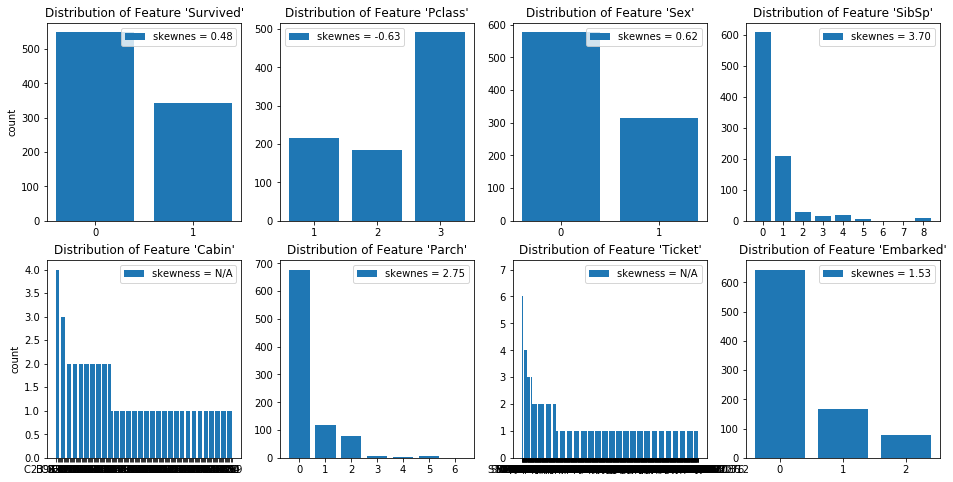

In [6]:
cat_features = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Cabin', 'Parch', 'Ticket', 'Embarked']

fig, axes = plt.subplots(nrows=2, ncols=4)
fig.set_size_inches(16, 8)

for k, feature in enumerate(cat_features):
    ax = axes[k // 4][k % 4]
    x = df[feature].value_counts().index
    y = df[feature].value_counts()
    if feature in ['Cabin', 'Ticket']:
        label = 'skewness = N/A'
    else:
        label = 'skewnes = {:.2f}'.format(df[feature].skew())
    ax.bar(x, y, label=label)
    ax.set_title("Distribution of Feature '{}'".format(feature))
    ax.legend()
    
    if k % 4 == 0:
        ax.set_ylabel('count')
        
    try:
        ax.set_xticks(np.arange(np.min(x), np.max(x) + 1))
    except:
        continue

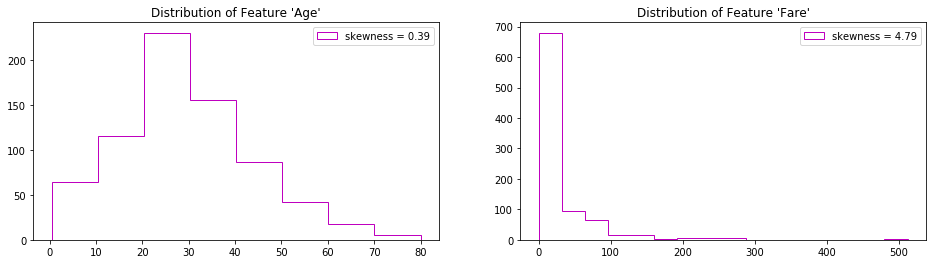

In [7]:
import warnings
warnings.filterwarnings('ignore')
numerical_features = ['Age', 'Fare']
bins = [8, 16]
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(16, 4)

for k, feature in enumerate(numerical_features):
    ax = axes[k]
    ax.hist(df[feature], bins=bins[k], histtype='step', color='m', label='skewness = {:.2f}'\
            .format(df[feature].skew()))
    ax.set_title("Distribution of Feature '{}'".format(feature))
    ax.legend()

#### 4. Use Pearson data correlation between the data set. 
Due to the Pearson score of the pair (SibSp, Survived) is closed to 0 and lowest, feature Sibsp can be the first candidate to be dropped.

In [8]:
corr_features = ['Age', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Survived']

abs(round(df[corr_features].corr(method='pearson'), 2))

,Age,Fare,Parch,Pclass,Sex,SibSp,Survived
Age,1.00,0.10,0.19,0.37,0.09,0.31,0.08
Fare,0.10,1.00,0.22,0.55,0.18,0.16,0.26
Parch,0.19,0.22,1.00,0.02,0.25,0.41,0.08
Pclass,0.37,0.55,0.02,1.00,0.13,0.08,0.34
Sex,0.09,0.18,0.25,0.13,1.00,0.11,0.54
SibSp,0.31,0.16,0.41,0.08,0.11,1.00,0.04
Survived,0.08,0.26,0.08,0.34,0.54,0.04,1.00


#### 5. Run a Chi-squared test between Sex and Survived columns. 

In [9]:
from scipy.stats import chi2, chi2_contingency 

""" Function determines whether to reject or not a Null hypothesis: 
    two features of a dataset are independent give an significant value.
    return a boolean value indicating the null hypothesis is rejected (True) or not (False) 
    feature_a, feature_b: two columns (series) of a Pandas dataframe
    significant_value: the critical value for the test
"""
def reject_null_hypothesis(feature_a, feature_b, significant_value=.05):
    table = pd.crosstab(feature_a, feature_b)
    chi2_test, p, dof, expected_freq = chi2_contingency(table)
    critical_value = chi2.ppf(1 - significant_value, dof)
    
    print('\nThe test statistics:', chi2_test)
    print('\np value: ', p)
    print('\nThe degree of freedom:', dof)
    print('\nThe expected frequencies:\n', expected_freq)
    print('\nCritical value:', critical_value)

    return chi2_test >= critical_value

In [10]:
reject_null_hypothesis(df.Sex, df.Survived)


The test statistics: 260.71702016732104

p value:  1.1973570627755645e-58

The degree of freedom: 1

The expected frequencies:
 [[355.52525253 221.47474747]
 [193.47474747 120.52525253]]

Critical value: 3.841458820694124


True

In [11]:
reject_null_hypothesis(df.SibSp, df.Survived)


The test statistics: 37.2717929152043

p value:  1.5585810465902147e-06

The degree of freedom: 6

The expected frequencies:
 [[374.62626263 233.37373737]
 [128.77777778  80.22222222]
 [ 17.25252525  10.74747475]
 [  9.85858586   6.14141414]
 [ 11.09090909   6.90909091]
 [  3.08080808   1.91919192]
 [  4.31313131   2.68686869]]

Critical value: 12.591587243743977


True

In [12]:
reject_null_hypothesis(df.Age, df.Survived)


The test statistics: 104.15604988902831

p value:  0.10141111018860959

The degree of freedom: 87

The expected frequencies:
 [[ 0.59383754  0.40616246]
 [ 0.59383754  0.40616246]
 [ 1.18767507  0.81232493]
 [ 1.18767507  0.81232493]
 [ 0.59383754  0.40616246]
 [ 4.15686275  2.84313725]
 [ 5.93837535  4.06162465]
 [ 3.56302521  2.43697479]
 [ 5.93837535  4.06162465]
 [ 2.37535014  1.62464986]
 [ 1.78151261  1.21848739]
 [ 1.78151261  1.21848739]
 [ 2.37535014  1.62464986]
 [ 4.75070028  3.24929972]
 [ 1.18767507  0.81232493]
 [ 2.37535014  1.62464986]
 [ 0.59383754  0.40616246]
 [ 1.18767507  0.81232493]
 [ 3.56302521  2.43697479]
 [ 0.59383754  0.40616246]
 [ 2.96918768  2.03081232]
 [10.0952381   6.9047619 ]
 [ 7.71988796  5.28011204]
 [15.43977591 10.56022409]
 [14.84593838 10.15406162]
 [ 8.90756303  6.09243697]
 [ 0.59383754  0.40616246]
 [14.25210084  9.74789916]
 [16.03361345 10.96638655]
 [ 8.90756303  6.09243697]
 [ 0.59383754  0.40616246]
 [17.81512605 12.18487395]
 [ 0.5938

False